In [2]:
import pickle, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
resDir = '/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results'
ctgr = [f.split('_')[1] for f in os.listdir(resDir) if '.pkl' in f]
# ctgr = os.listdir(resDir)
# genelist = ['HMGCS1', 'TOP2A', 'DNAJB1', 'PCNA', 'HMOX1']
celllist = ['MCF7', 'A549', 'PC3']
quotasize = [30,100]


In [5]:
ctgr = list(set(ctgr))
ctgr

['KMeansSampling',
 'BALDDropout',
 'MarginSampling',
 'LeastConfidence',
 'AdversarialBIM',
 'RandomSampling',
 'KCenterGreedy',
 'BadgeSampling']

## Deliver the averaged F1 comparison of different step size and query strategies.

In [6]:
dictData = {key:{} for key in ctgr}
files = [f for f in os.listdir(resDir) if '.pkl' in f]
for q in ctgr:
    # print(q)
    dictQ = dictData[q]
    for s in quotasize:
        # print(s)
        dictQ[s] = []
        tmpfile = [f for f in files if f'{q}_5_0_{s}' in f]
        mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/{tmpfile[0]}'
        # print(mtcPath)
        try:
            with open(mtcPath, 'rb') as f:
                all_acc,all_f1 = pickle.load(f)
        except:
            # print('wrong')
            continue
        all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
        # extract the last cycle f1
        all_f1 = np.array(all_f1)[:, -1, :]
        # average of cell lines
        f1 = np.mean(all_f1, axis=1)
        print(f"{q}-{s}: Mean: {f1.mean():.3f}, Std: {f1.std():.3f}")
        dictQ[s] = (round(f1.mean(),3), round(f1.std(),3))

KMeansSampling-30: Mean: 0.492, Std: 0.003
KMeansSampling-100: Mean: 0.432, Std: 0.006
BALDDropout-30: Mean: 0.431, Std: 0.002
BALDDropout-100: Mean: 0.438, Std: 0.002
MarginSampling-30: Mean: 0.501, Std: 0.002
MarginSampling-100: Mean: 0.451, Std: 0.003
LeastConfidence-30: Mean: 0.500, Std: 0.002
LeastConfidence-100: Mean: 0.454, Std: 0.003
AdversarialBIM-30: Mean: 0.490, Std: 0.002
AdversarialBIM-100: Mean: 0.447, Std: 0.003
RandomSampling-30: Mean: 0.412, Std: 0.001
RandomSampling-100: Mean: 0.426, Std: 0.005
KCenterGreedy-30: Mean: 0.479, Std: 0.002
KCenterGreedy-100: Mean: 0.429, Std: 0.003
BadgeSampling-30: Mean: 0.477, Std: 0.005
BadgeSampling-100: Mean: 0.426, Std: 0.004


In [7]:
print(dictData)
pd.DataFrame.from_dict(dictData)

{'KMeansSampling': {30: (0.492, 0.003), 100: (0.432, 0.006)}, 'BALDDropout': {30: (0.431, 0.002), 100: (0.438, 0.002)}, 'MarginSampling': {30: (0.501, 0.002), 100: (0.451, 0.003)}, 'LeastConfidence': {30: (0.5, 0.002), 100: (0.454, 0.003)}, 'AdversarialBIM': {30: (0.49, 0.002), 100: (0.447, 0.003)}, 'RandomSampling': {30: (0.412, 0.001), 100: (0.426, 0.005)}, 'KCenterGreedy': {30: (0.479, 0.002), 100: (0.429, 0.003)}, 'BadgeSampling': {30: (0.477, 0.005), 100: (0.426, 0.004)}}


,KMeansSampling,BALDDropout,MarginSampling,LeastConfidence,AdversarialBIM,RandomSampling,KCenterGreedy,BadgeSampling
30,"(0.492, 0.003)","(0.431, 0.002)","(0.501, 0.002)","(0.5, 0.002)","(0.49, 0.002)","(0.412, 0.001)","(0.479, 0.002)","(0.477, 0.005)"
100,"(0.432, 0.006)","(0.438, 0.002)","(0.451, 0.003)","(0.454, 0.003)","(0.447, 0.003)","(0.426, 0.005)","(0.429, 0.003)","(0.426, 0.004)"


In [9]:
dictData = {key:{} for key in ctgr}
files = [f for f in os.listdir(resDir) if '.pkl' in f]
for q in ctgr:
    # print(q)
    dictQ = dictData[q]
    for s in quotasize:
        # print(s)
        dictQ[s] = []
        tmpfile = [f for f in files if f'{q}_5_0_{s}' in f]
        mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/{tmpfile[0]}'
        # print(mtcPath)
        try:
            with open(mtcPath, 'rb') as f:
                all_acc,all_f1 = pickle.load(f)
        except:
            # print('wrong')
            continue
        all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
        # extract the last cycle f1
        all_f1 = np.array(all_f1)[:, -1, :]
        # average of cell lines
        f1 = np.mean(all_f1, axis=0)
        print(f'{q}-{s}:{f1[0]:.3f}, {f1[1]:.3f}, {f1[2]:.3f}')

KMeansSampling-30:0.470, 0.517, 0.490
KMeansSampling-100:0.416, 0.450, 0.429
BALDDropout-30:0.410, 0.457, 0.427
BALDDropout-100:0.422, 0.455, 0.436
MarginSampling-30:0.474, 0.528, 0.502
MarginSampling-100:0.433, 0.471, 0.448
LeastConfidence-30:0.472, 0.530, 0.498
LeastConfidence-100:0.433, 0.476, 0.454
AdversarialBIM-30:0.465, 0.516, 0.488
AdversarialBIM-100:0.427, 0.472, 0.444
RandomSampling-30:0.393, 0.436, 0.407
RandomSampling-100:0.403, 0.456, 0.418
KCenterGreedy-30:0.445, 0.511, 0.482
KCenterGreedy-100:0.409, 0.454, 0.425
BadgeSampling-30:0.458, 0.502, 0.471
BadgeSampling-100:0.398, 0.450, 0.430


In [12]:
data = np.array(data)
df = pd.DataFrame(data=data, columns=celllist, index=ctgr)
df.to_csv('/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/sum.csv')

In [10]:
# ["viridis", "RdBu", "Set1", "jet"]
cmap = mpl.color_sequences.get("RdBu")

In [11]:
cmap

## Deliver the F1 curve example.

30
KMeansSampling
(3, 7, 3)
(7, 3)
(7,)
BALDDropout
(3, 7, 3)
(7, 3)
(7,)
MarginSampling
(3, 7, 3)
(7, 3)
(7,)
LeastConfidence
(3, 7, 3)
(7, 3)
(7,)
AdversarialBIM
(3, 7, 3)
(7, 3)
(7,)
RandomSampling
(3, 7, 3)
(7, 3)
(7,)
KCenterGreedy
(3, 7, 3)
(7, 3)
(7,)
BadgeSampling
(3, 7, 3)
(7, 3)
(7,)


/tmp/ipykernel_1770394/2729924634.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("RdBu")


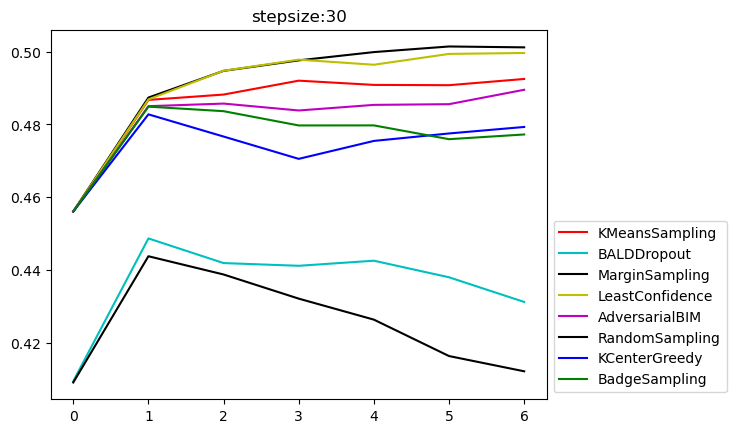

100
KMeansSampling
(3, 21, 3)
(21, 3)
(21,)
BALDDropout
(3, 21, 3)
(21, 3)
(21,)
MarginSampling
(3, 21, 3)
(21, 3)
(21,)
LeastConfidence
(3, 21, 3)
(21, 3)
(21,)
AdversarialBIM
(3, 21, 3)
(21, 3)
(21,)
RandomSampling
(3, 21, 3)
(21, 3)
(21,)
KCenterGreedy
(3, 21, 3)
(21, 3)
(21,)
BadgeSampling
(3, 21, 3)
(21, 3)
(21,)


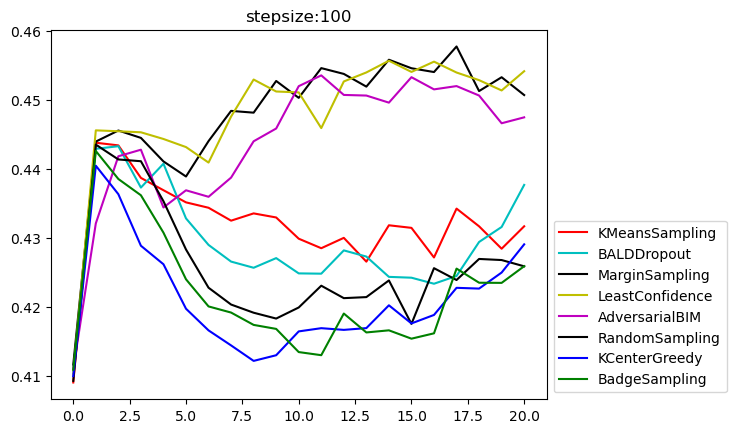

In [16]:
# ["viridis", "RdBu", "Set1", "jet"]
files = [f for f in os.listdir(resDir) if '.pkl' in f]
cmap = mpl.cm.get_cmap("RdBu")
for s in quotasize:
    print(s)
    dots = {
        "A549": 'D-',
        "MCF7": 'o-',
        "PC3": 'x-',
    }
    clrs = {
        'KCenterGreedy': 'b', 
        'KMeansSampling': 'r', 
        'BadgeSampling': 'g',
        'LeastConfidence': 'y',
        'MarginSampling': 'k',
        'BALDDropout': 'c',
        'AdversarialBIM': 'm',
        'RandomSampling': 'k'
    }
    rds = int(s/5 + 1)
    for q in ctgr:
        print(q)
        tmpfile = [f for f in files if f'{q}_5_0_{s}' in f]
        mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/{tmpfile[0]}'
        try:
            with open(mtcPath, 'rb') as f:
                all_acc,all_f1 = pickle.load(f)
        except:
            continue
        all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
        print(all_f1.shape)
        all_f1 = np.mean(all_f1, axis=0)
        print(all_f1.shape)
        f1 = np.mean(all_f1, axis=1)
        print(f1.shape)
        plt.plot(np.arange(0, rds, 1), f1, f'{clrs[q]}',label=f'{q}')
    plt.legend(bbox_to_anchor=(1., 0.), loc="lower left")
    plt.title(f'stepsize:{s}')
    plt.show()

5


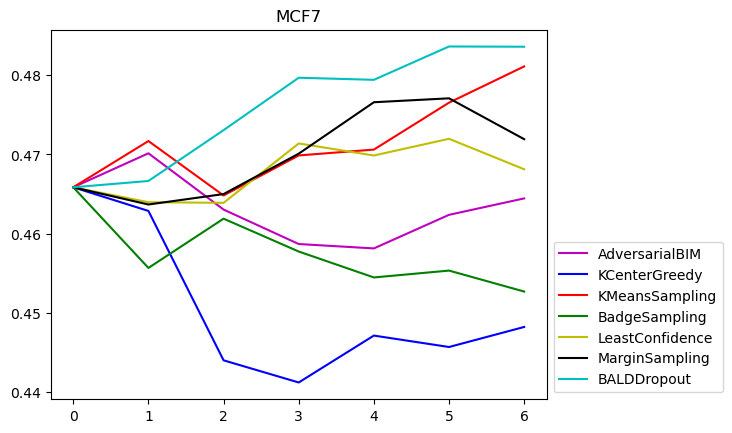

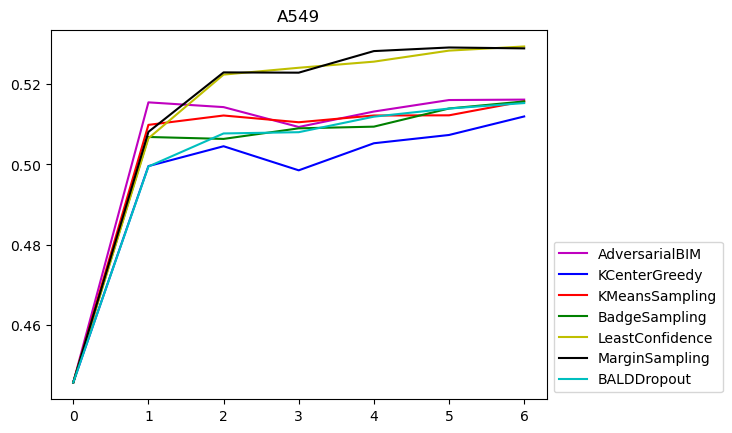

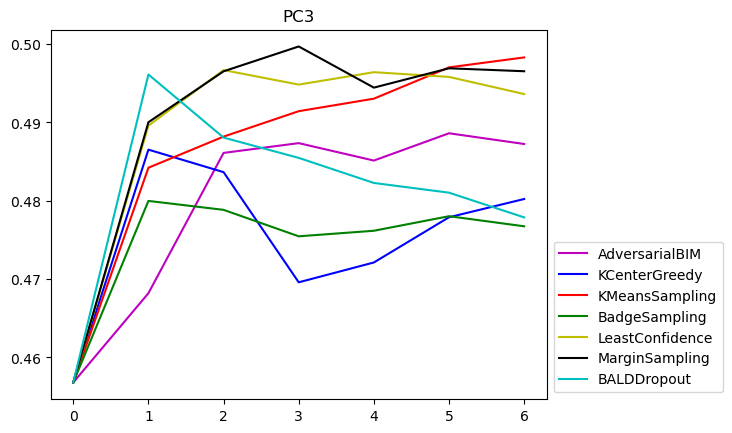

In [27]:
for s in steplist:
    print(s)
    dots = {
        "A549": 'D-',
        "MCF7": 'o-',
        "PC3": 'x-',
    }
    clrs = {
        'KCenterGreedy': 'b', 
        'KMeansSampling': 'r', 
        'BadgeSampling': 'g',
        'LeastConfidence': 'y',
        'MarginSampling': 'k',
        'BALDDropout': 'c',
        'AdversarialBIM': 'm',
    }
    rds = int(30/s + 1)
    for i in range(len(celllist)):
        for q in ctgr:
            # print(q)
            mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/LINCS_{q}_{s}_0_30.pkl'
            try:
                with open(mtcPath, 'rb') as f:
                    all_acc,all_f1 = pickle.load(f)
            except:
                mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/LINCS_{q}_5_0_30_20240203_024916_.pkl'
                with open(mtcPath, 'rb') as f:
                    all_acc,all_f1 = pickle.load(f)
            all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
            # print(all_f1.shape)
            all_f1 = np.mean(all_f1, axis=0)
            # print(all_f1.shape)
            f1 = all_f1[:,i]
            # print(f1.shape)
            plt.plot(np.arange(0, rds, 1), f1, f'{clrs[q]}',label=f'{q}')
        plt.legend(bbox_to_anchor=(1., 0.), loc="lower left")
        plt.title(celllist[i])
        plt.show()